# Getting Started with GPT-3 Engines

copyright 2021 OpenAI

copyright 2021,2022 Denis Rothman 

This notebook is for educational purposes only. Do not copy the content of this notebook without the written permission of OpenAI.


In [1]:
from IPython.display import Image     #This is used for rendering images in the notebook

## Step 1: Installing & importing OpenAI

In [ ]:
try:
  import openai
except:
  !pip install openai
  import openai

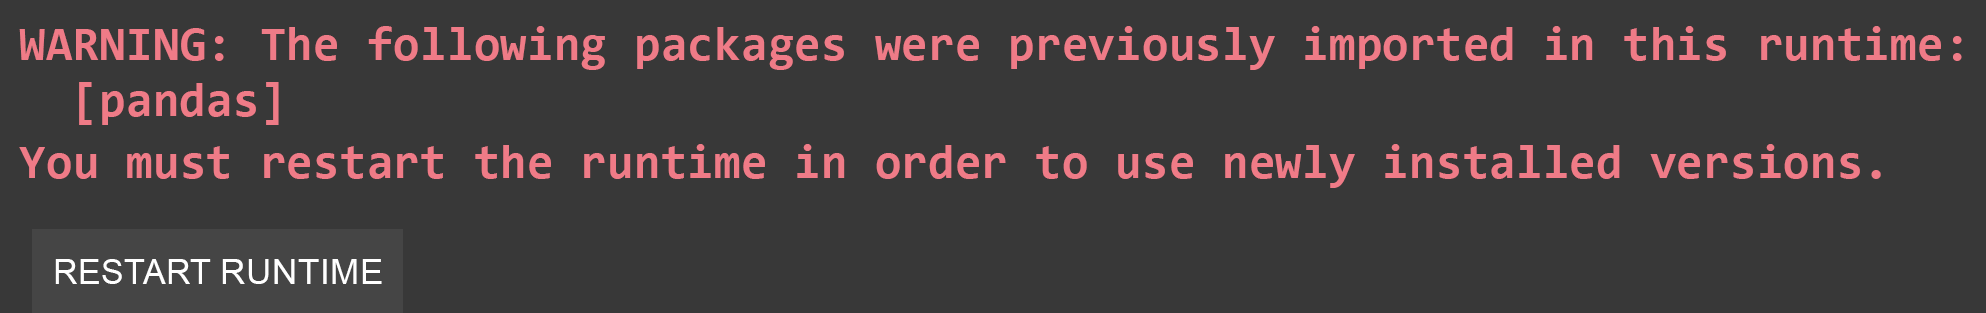

In [7]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/07/B17948_07_10.png', width=500) #This is used for rendering images in the notebook

## Step 2: Entering the API KEY

In [ ]:
openai.api_key="[YOUR_KEY]"

In [ ]:
import os
import openai
os.environ['OPENAI_API_KEY'] ='[YOUR_KEY or KEY variable]'
print(os.getenv('OPENAI_API_KEY'))
openai.api_key = os.getenv("OPENAI_API_KEY")

## Step 3: Running an NLP tasks with the default parameters



## Step 4: Example 1: Grammar correction

https://beta.openai.com/examples/default-grammar


In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="Original: She no went to the market.\nStandard American English:",
  temperature=0,
  max_tokens=60,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=0.0,
  stop=["\n"]
)

In [ ]:
#displaying the response object
print(response)

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": " She didn't go to the market."
    }
  ],
  "created": 1642322148,
  "id": "cmpl-4QvIqMCmFgAQKGKDaony4B7wTQtSz",
  "model": "davinci:2020-05-03",
  "object": "text_completion"
}


In [ ]:
# retrieving the value of "text" in the dicionary
r = (response["choices"][0])
print(r["text"])

 She didn't go to the market.


## Example 2: Translation

https://beta.openai.com/examples/default-translate


In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="Original: She no went to the market.\n French with no contractions:",
  temperature=0, 
  max_tokens=60,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=0.0,
  stop=["\n"]
)
r = (response["choices"][0])
print(r["text"])

 Elle n'est pas allée au marché.


## Example 3: Instruct series

https://beta.openai.com/docs/engines/instruct-series-beta

In [ ]:
response = openai.Completion.create(
  engine="davinci-instruct-beta",
  prompt="Write a plan of actions based on these instructions:\n\nStart Internet Explorer.\nYou need to eventually click on the advanced tab.\nBut before that, click on the Internet options on the tools menu.\nAfter the click on the advanced tab, click to clear or select the enable\npersonalized favorite menu check box.\n\n\nACTIONS:",
  temperature=0,
  max_tokens=120,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)
r = (response["choices"][0])
print(r["text"])



1. Start Internet Explorer.
2. Click on the tools menu.
3. Click on the Internet options.
4. Click on the advanced tab.
5. Click to clear or select the enable personalized favorite menu check box.


## Example 4: Movie to emoji

https://beta.openai.com/examples/default-movie-to-emoji

In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="Back to Future: 👨👴🚗🕒\nBatman: 🤵🦇\nTransformers: 🚗🤖\nWonder Woman: 👸🏻👸🏼👸🏽👸🏾👸🏿\nWinnie the Pooh: 🐻🐼🐻\nThe Godfather: 👨👩👧🕵🏻‍♂️👲💥\nGame of Thrones: 🏹🗡🗡🏹\nSpider-Man:",
  temperature=0.8,
  max_tokens=60,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["\n"]
)
r = (response["choices"][0])
print(r["text"])

 🕷🕸🕷🕸


In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="Back to Future: 👨👴🚗🕒\nBatman: 🤵🦇\nTransformers: 🚗🤖\nWonder Woman: 👸🏻👸🏼👸🏽👸🏾👸🏿\nWinnie the Pooh: 🐻🐼🐻\nThe Godfather: 👨👩👧🕵🏻‍♂️👲💥\nGame of Thrones: 🏹🗡🗡🏹\nSpider-Man: 🕷🕸🕷🕸\nAvatar:",
  temperature=0.8,
  max_tokens=60,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["\n"]
)
r = (response["choices"][0])
print(r["text"])

 📷🌴🌴🌴📷


## Example 5: Programming language to another language. For example: Python to Javascript

https://beta.openai.com/examples/default-js-to-py


In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="##### Translate this function  from Python into Javascript\n### Python\n    \n    def predict_proba(X: Iterable[str]):\n        return np.array([predict_one_probas(tweet) for tweet in X])\n    \n### Javascript\n    \n    function predict_proba(X: Iterable[str]):\n        return np.array([predict_one_probas(tweet) for tweet in X])\n\n# Now we can use the function in Javascript\n%%",
  temperature=0,
  max_tokens=54,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["###"]
)
r = (response["choices"][0])
print(r["text"])

javascript

// Now we can use the function in Javascript

var predict_proba = function(X: Iterable[str]):
    return np.array([predict_one_probas(tweet) for tweet in X])


## Example 6: Advanced Tweet classifier

https://beta.openai.com/examples/default-tweet-classifier


In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="This is a tweet sentiment classifier\nTweet: \"I loved the new Batman movie!\"\nSentiment: Positive\n###\nTweet: \"I hate it when my phone battery dies\"\nSentiment: Negative\n###\nTweet: \"My day has been 👍\"\nSentiment: Positive\n###\nTweet: \"This is the link to the article\"\nSentiment: Neutral\n###\nTweet text\n\n\n1. \"I loved the new Batman movie!\"\n2. \"I hate it when my phone battery dies\"\n3. \"My day has been 👍\"\n4. \"This is the link to the article\"\n5. \"This new music video blew my mind\"\n\n\nTweet sentiment ratings:\n1: Positive\n2: Negative\n3: Positive\n4: Neutral\n5: Positive\n\n\n###\nTweet text\n\n\n1. \"I can't stand homework\"\n2. \"This sucks. I'm bored 😠\"\n3. \"I can't wait for Halloween!!!\"\n4. \"My cat is adorable ❤️❤️\"\n5. \"I hate chocolate\"\n\n\nTweet sentiment ratings:\n1.",
  temperature=0.3,
  max_tokens=60,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["###"]
)
r = (response["choices"][0])
print(r["text"])

 Negative
2. Negative
3. Positive
4. Positive
5. Negative





In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="This is a tweet sentiment classifier\nSentence: \"What does semiotics mean?\"\n\nA: ",
  temperature=0,
  max_tokens=100,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["\n"]
)
r = (response["choices"][0])
print(r["text"])

 "semiotics is the study of signs and symbols"


## Example 7: Q&A

https://beta.openai.com/examples/default-qa


In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="Q: What does semiotics mean?\nA: Semiotics is the study of signs and symbols.\n\nA: ",
  temperature=0,
  max_tokens=100,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["\n"]
)
r = (response["choices"][0])
print(r["text"])

 Semiotics is the study of signs and symbols.


## Example 8 : Summarize a text

https://beta.openai.com/examples/default-summarize

In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="My second grader asked me what this passage means:\n\"\"\"\nJupiter is the fifth planet from the Sun and the largest in the Solar System. It is a gas giant with a mass one-thousandth that of the Sun, but two-and-a-half times that of all the other planets in the Solar System combined. Jupiter is one of the brightest objects visible to the naked eye in the night sky, and has been known to ancient civilizations since before recorded history. It is named after the Roman god Jupiter.[19] When viewed from Earth, Jupiter can be bright enough for its reflected light to cast visible shadows,[20] and is on average the third-brightest natural object in the night sky after the Moon and Venus.\n\"\"\"\nI rephrased it for him, in plain language a second grader can understand:\n\"\"\"\n",
  temperature=0.5,
  max_tokens=100,
  top_p=1,
  frequency_penalty=0.2,
  presence_penalty=0,
  stop=["\"\"\""]
)
r = (response["choices"][0])
print(r["text"])

Jupiter is the fifth planet from the Sun. The fifth planet is the largest planet in the Solar System. Jupiter is a gas giant. It is two-and-a-half times bigger than all the other planets together. It is a bright object in the night sky, and it can be seen from Earth.
Jupiter is named after the Roman god Jupiter. When viewed from Earth, Jupiter can be bright enough for its reflected light to cast visible shadows.
Jupiter is on average


## Example 9: Parse unstructured data

https://beta.openai.com/examples/default-parse-data


In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="There are many fruits that were found on the recently discovered planet Goocrux. There are neoskizzles that grow there, which are purple and taste like candy. There are also loheckles, which are a grayish blue fruit and are very tart, a little bit like a lemon. Pounits are a bright green color and are more savory than sweet. There are also plenty of loopnovas which are a neon pink flavor and taste like cotton candy. Finally, there are fruits called glowls, which have a very sour and bitter taste which is acidic and caustic, and a pale orange tinge to them.\n\nPlease make a table summarizing the fruits from Goocrux\n| Fruit | Color | Flavor |\n| Neoskizzles | Purple | Sweet |\n| Loheckles | Grayish blue | Tart |\n",
  temperature=0,
  max_tokens=100,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["\n\n"]
)
r = (response["choices"][0])
print(r["text"])

| Pounits | Bright green | Savory |
| Loopnovas | Neon pink | Cotton candy |
| Glowls | Pale orange | Sour |
| Other | |


## Example 10 : Calculate Time Complexity

https://beta.openai.com/examples/default-time-complexity

In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="def foo(n, k):\naccum = 0\nfor i in range(n):\n    for l in range(k):\n        accum += i\nreturn accum\n\"\"\"\nThe time complexity of this function is",
  temperature=0,
  max_tokens=64,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["\n"]
)
r = (response["choices"][0])
print(r["text"])

 O(nk).


In [ ]:
response = openai.Completion.create(
  engine="davinci",
  prompt="A single column spreadsheet of industry names:\n\n\nIndustry|\nAccounting/Finance\nAdvertising/Public Relations\nAerospace/Aviation\nArts/Entertainment/Publishing\nAutomotive\nBanking/Mortgage\nBusiness Development\nBusiness Opportunity\nClerical/Administrative\nConstruction/Facilities\nConsumer Goods\nCustomer Service\nEducation/Training\nEnergy/Utilities\nEngineering\nGovernment/Military\nGreen\n\n\n###\n\n\nA spreadsheet of top science fiction movies and the year of release:\n\n\nTitle|Year\nStar Wars|1977\nJaws|1975\nThe Exorcist|1973\nET|1982\nAliens|1986\nTerminator|1984\nBlade Runner|1982\nThe Thing|1982\nJurassic Park|1993\nThe Matrix|1999\n\n\n###\n\n\nA spreadsheet of hurricane and tropical storm counts with 13 columns:\n\n\n\"Month\"| \"Average\"| \"2005\"| \"2006\"| \"2007\"| \"2008\"| \"2009\"| \"2010\"| \"2011\"| \"2012\"| \"2013\"| \"2014\"| \"2015\"\n\"May\"|  0.1|  0|  0| 1| 1| 0| 0| 0| 2| 0|  0|  0  \n\"Jun\"|  0.5|  2|  1| 1| 0| 0| 1| 1| 2| 2|  0|  1\n\"Jul\"|  0.7|  5|  1| 1| 2| 0| 1| 3| 0| 2|  2|  1\n\"Aug\"|  2.3|  6|  3| 2| 4| 4| 4| 7| 8| 2|  2|  3\n\"Sep\"|  3.5|  6|  4| 7| 4| 2| 8| 5| 2| 5|  2|  5\n\"Oct\"|  2.0|  8|  0| 1| 3| 2| 5| 1| 5| 2|  3|  0\n\"Nov\"|  0.5|  3|  0| 0| 1| 1| 0| 1| 0| 1|  0|  1\n\"Dec\"|  0.0|  1|  0| 1| 0| 0| 0| 0| 0| 0|  0|  1\n    \n###\n\n\nA single column spreadsheet of days of the week:\n\n\nDay|\nMonday\nTuesday\nWednesday\nThursday\nFriday\nSaturday\nSunday\n\n\n###\n\n\nA two column spreadsheet of computer languages and their difficulty level:",
  temperature=0.3,
  max_tokens=60,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["/n"]
)
r = (response["choices"][0])
print(r["text"])




Language|Difficulty
C|Easy
Java|Medium
C++|Hard
Perl|Easy
Python|Easy
Ruby|Easy
PHP|Easy
C#|Easy
JavaScript|Easy
VB.NET|Easy

VB|Easy


